Goals
========
 - What is numpy?: array, ndarray, and some operations
 - What is scipy?
 - Intro to matplotlib

In [1]:
# These are the standard "qualified" (as) imports
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # makes plots pretty
print 'mpl ', mpl.__version__
print 'numpy',np.__version__

mpl  1.4.3
numpy 1.9.2


In [10]:
print 'mpl ', mpl.__version__
print 'numpy',np.__version__


mpl  1.3.1
numpy 1.8.2


# Numpy

**What is numpy?**
-------------

If you've ever used MATLAB, you know that writing out loops to add two vectors / find dot products / multiply two matrices / etc. is possible but _very_ slow.  Instead, you should use "vectorized" built-in operations that can do the looping in a faster language or even pick a better algorithm.

Python is similar.  _Numpy_ is the package that provides the means to do performant numerical calculations in Python.  If you've converted your problem into linear algebra and matrices, then _numpy_ will let you write it to run fast.

**Why are Python arrays unsuitable for numerical computation**

There are two basic reasons why Python on its own is insufficient here:
  - _Data structure._  A Python list is a complicated thing, just consider something like
        
           x = [1, "23", BeautifulSoup(urllib2.urlopen("https://www.google.com/#q=4")), 5 ]
    
    where x[0] and x[3] is a number (of some sort), x[1] is a string, and x[2] is a complicated object.  If you're familiar with a low-level language like C, just imagine how this must be stored in memory: 
    
    In the typical Python implementation, this might be stored as a linked list of pointers to "Python object" data structures which in turn stores what class the object is an instance of, a pointer to a dictionary (i.e., hash table) of instance variables, and a pointer to a dictionary of class variables.  This is reasonable for x[2], but for x[0] and x[3]...
    
  - _Typing and dispatch._  When we write `x[0] + x[3]`, what happens?  You can overload `+` for all sorts of purposes in Python, and the decision of exactly what `+` means happens at run-time by a dictionary lookup.  If you were term-wise adding two arrays, `x` and `y`, then because arrays can contain elements of different types this has to happen _for each term_.

**What numpy does for us**:

The basic thing that `numpy` lets us do is fix these two things by giving us (back) ordinary C-style arrays of integers, floating point numbers, etc. and functions that operate on them in a smart way.  It also gives us C-style higher dimensional arrays.  

Note that C-style arrays are good for more than just quickly performing operations through Python: They're also good for talking to existing C and Fortran code, and this second usage explains why numpy matters to you even if you won't do any matrix computations by hand: Many of the libraries that you _will_ want to use will use numpy arrays under the hood.


**Data types (the nouns):**
  - `np.array`:  This is a C-style array, that is it is just a big contiguous block of integers (or floats, or.. but just one type per array) of fixed length.
  - `np.ndarray`: This is a C-style "n-D" array.  That is, it is **also** just a big contiguous block of integers (or, ...) together with a factorization of its size into "dimensions"
  
  $$       N = n_1 n_2 ... n_d        $$
  
  In other words the arrays that you might denote [1,2,3,4] and [[1,2],[3,4]] have the same underlying block of values, just with different dimensions: the first one has [4], while the second [2,2].
  
 For an alternate visual: Imagine a grid and numbering it by reading left to right -- next row -- left to right -- next row, etc.   For instance, in C the following bits of code are functionally equivalent
  
  >        
          int chessboard[64];
          //Do something
          chessboard[8*row + column] += 1;
  
  and
  
  >        
          int chessboard[8][8];
          //Do something
          chessboard[row][column] += 1;
          
  In this case the numbering (i.e., mapping to a single flat list of numbers) goes
  >        
          0  1  2  3  4  5  6  7
          8  9 10 11 ..
          16 ..
          ..
          
  - **np.matrix**: The case of 2D arrays, or "matrices", is given a special wrapper with different operations.  Feel free to look this up on your own, we'll stick to the array types today.

**Operations (the verbs)**:

In broad types the things we can do are:
  - Create arrays.
  - Slicing or reshaping: Taking a sub-block of a block of values.  Both slicing and reshaping are  examples of a "view" or a "shallow copy", because they do not actually copy the underlying block of data.
  - "Universal functions": This is numpy's name for functions that are applied term-by-term, like the arithmetic operations or `sin`.
  - Linear algebra / matrix operations.
  - Mathematical convenience functions: FFT, ...
  
Here's a table that shows some example syntax:
  
   Command  |  Explanation
   ---------|--------------
  `np.array(python_list[, dtype='int'])` | Convert a Python list to an np array.  The dtype can be one of several things, such as 'int64', 'float32', 'float64', etc.
  `np.ndarray(shape=[1,2,3], buffer=an_np_array, dtype='int')`  | Makes a higher dimensional array whose underlying block of data is the given np_array.
  `np.arange(-5,5,1)` | Like Python's range, but slightly faster than np.array(range(-5,5,1)).
  `+`, `*`, `-`, `/`, `np.sin`, ... | All of the standard numerical and mathematical functions are back.  They always operate term-by-term.  That is, `x+y` is ordinary vector addition but `x*y` is term-wise product (not dot product).
   `np.dot(x,y)` or `x.dot(y)` | Inner product (along the last dimension, for n-D arrays).  Note that this includes matrix multiplication for 2-D arrays.
   `an_np_array.reshape([1,2,3])`  |  Reshape an np.array or np.ndarray to one with different shape (but of the same size).
   
All pretty simple!  Let's do a few quick examples.

In [3]:
x = np.array(range(-5,5,1))  # Numpy will make intelligent guesses about your intended data type
                             # And will convert between them if needed:

y = np.sin(x)                # Evaluated termwise             
print x.dtype
print y.dtype
print 2 * x
print x
print y

int64
float64
[-10  -8  -6  -4  -2   0   2   4   6   8]
[-5 -4 -3 -2 -1  0  1  2  3  4]
[ 0.95892427  0.7568025  -0.14112001 -0.90929743 -0.84147098  0.
  0.84147098  0.90929743  0.14112001 -0.7568025 ]


In [4]:
# Basic math operations
print x*x
print np.dot(x,x)
print np.sqrt(x**2+y**2)
print np.outer(x,x)
print np.outer(x,x).dot(x)

# How would you multiply two matrices?

[25 16  9  4  1  0  1  4  9 16]
85
[ 5.09112323  4.07096426  3.00331731  2.19700292  1.30693283  0.
  1.30693283  2.19700292  3.00331731  4.07096426]
[[ 25  20  15  10   5   0  -5 -10 -15 -20]
 [ 20  16  12   8   4   0  -4  -8 -12 -16]
 [ 15  12   9   6   3   0  -3  -6  -9 -12]
 [ 10   8   6   4   2   0  -2  -4  -6  -8]
 [  5   4   3   2   1   0  -1  -2  -3  -4]
 [  0   0   0   0   0   0   0   0   0   0]
 [ -5  -4  -3  -2  -1   0   1   2   3   4]
 [-10  -8  -6  -4  -2   0   2   4   6   8]
 [-15 -12  -9  -6  -3   0   3   6   9  12]
 [-20 -16 -12  -8  -4   0   4   8  12  16]]
[-425 -340 -255 -170  -85    0   85  170  255  340]


In [5]:
# You can do basic stats on ndarrays:
print x.mean()
print x.std()

-0.5
2.87228132327


In [ ]:
# You can take the same data, and assert that it has a given shape
print x.reshape(2,5)

# Or specify shape and data type
A = np.ndarray(shape=(2,3,3), dtype=int, buffer=np.arange(1,100))
print A

Gotchas
=========

1. Matrix multiplication, on arrays, is denoted by `A.dot(B)`.  Tranpose is denoted by `A.T`.  Fair enough. 
2. If `A` is a 1-D array, then we often think of it as a vector.  This will usually give you the right "linear algebra notation" answer, e.g., if `M` is a 2-D array of the right size then
        A.dot(M)
        M.dot(A)
   do represent the matrix products you think (where `A` is turned into a row or column vector as needed).
   
   If `A` is a 1-D array, then it is not the case that `A` is always a row (or column) vector -- numpy makes creative guesses about how to interpret it as a higher dimensional array.  For instance: `A.dot(A.T) = A.dot(A) = np.dot(A,A)` is the ordinary scalar dot product.  For the matrix outer product $A^T A$ one must use `np.outer(A)` or _explicitly reshape_ `A` it as a a column vector, i.e., a 2-D array with just one column:
>             
        # v = A.reshape( [len(A), 1] )
        v = A[:,np.newaxis]
        v.dot(v.T) == np.outer(A, A)


In [6]:
A=np.arange(10)
v = A[:,np.newaxis]  # note the way you can "promote" a vector to a matrix
print A.shape
print v.shape
print A.dot(A.T)
print v.dot(v.T)

(10,)
(10, 1)
285
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]


**Exercises:**
Write a one-line function, which when given a random `np.array`,
1. returns the range (max - min)
1. returns the noramlized random variable (subtract the mean and divide by standard deviation)
1. returns the value closest to the mean

Additional exercises:
1. Create a $4 \times 4$ identity matrix.
1. Generate the 2D array
```
1 2 3
4 5 6
7 8 9
```
(without typing it out).
1. Generate a random $4 \times 4 \times 4$ array of Gaussianly distributed numbrs.
1. Generate `n` evenly spaced intervals between 0. and 1.
1. Create an $8 \times 8$ `np.ndarray` representing a chess board where the red squares are 1 and the white squares are 0.

Looking for more?  Checkout  the Neophyte, Novice, and  Apprentice levels [here](http://www.loria.fr/~rougier/teaching/numpy.100/).  They get unnecessarily complicated after that.

**Scipy**
=============

_Scipy_ hooks into efficient implementations (in C and Fortran) of a variety of numerical techniques:

- numerical integration 
- numerical differentiation 
- optimization and root finding
- sparse linear algebra  <small>(`numpy` is for _dense_ linear algebra)</small>
- and more

The input / output from these commands often involves numpy arrays.

For instance:

Populating the interactive namespace from numpy and matplotlib
  status: 1
 success: True
     qtf: array([ -9.79576420e-11])
    nfev: 10
       r: array([-2.82842764])
     fun: array([  4.44089210e-16])
       x: array([ 1.41421356])
 message: 'The solution converged.'
    fjac: array([[-1.]])


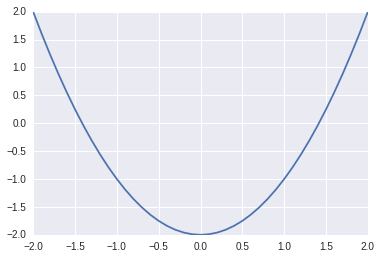

In [3]:
%pylab inline
function = lambda x: x**2 - 2
x = np.arange(-2,2.,.1-1e-9)
y = function(x)
plt.plot(x, y)

import scipy.optimize
print scipy.optimize.root(lambda x: x**2-2, 4)

In [ ]:
scipy.optimize.minimize?

**Exercises**:
1. Linear regression is a *Least Squares* model because it minimizes the potential function
$$ \sum_i (y_i - (b_0 + b_1 X_{1i} + \cdots b_p X_{pi}))^2 $$
Use the matrix operations provided by numpy and the optimization routines provided by scipy to write your own least-squares routine.  Check the result using `numpy.linalg.lstsq`.

1. Generate some noisy data fitting the model $y = e^{-a x} + b + \epsilon$ where $\epsilon$ is random Gaussian noise and $a>0$ and $b$ are real numbers.  Use `scipy.optimize.curve_fit` to git the data to the parametric form $f(x) = e^{-a x} + b$ and check that you can recover the values of $a$ and $b$.

**Matplotlib**
================

_Matplotlib_ lets you plot things, and _pyplot_ is a layer on top of it to give it a MATLAB-like syntax. We'll go into more depth on visualization next week, but for now we'll just briefly give examples of

- Line plots
- Bar plots and historgrams
- Scatter plots
- ...

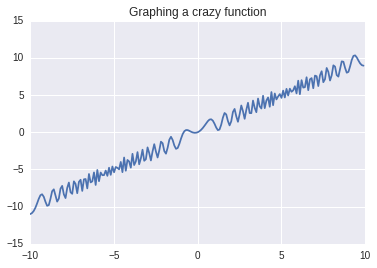

In [4]:
# Line plot example
x = np.arange(-10,10,0.1)
y = np.sin(3*x**2)+x

# The various plot elements are, by default, cumulative:
# This this cell with each one of the following lines commented out.

plt.title("Graphing a crazy function")
plt.plot(x,y)

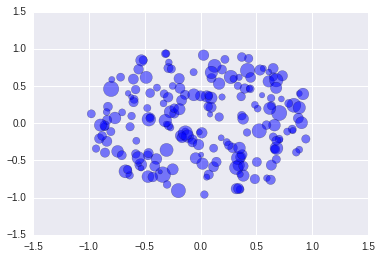

In [5]:
# Scatter plot

# Generate randomly sampled dots within the unit circle, with gamma-distributed radius
N=250
A=20
xo,yo = np.random.uniform(low=-1, high=1, size=N), np.random.uniform(low=-1, high=1, size=N)
so = A*np.random.gamma(4.5, 1.0, size=N)

x = xo[xo**2+yo**2 < 1]
y = yo[xo**2+yo**2 < 1]
s = so[xo**2+yo**2 < 1]

# Scatter plot, with _s_izes and translucent circles
plt.scatter(x,y, s=s, alpha=0.5)

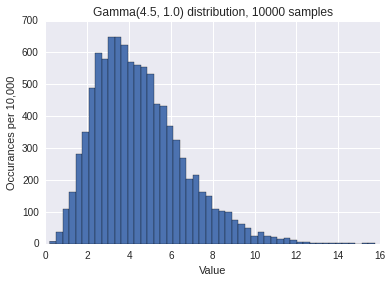

In [6]:
# Histogram example, with labels
data = np.random.gamma(4.5, 1.0, 10000)
plt.hist(data, bins=50)
plt.title("Gamma(4.5, 1.0) distribution, 10000 samples")
plt.xlabel("Value")
plt.ylabel("Occurances per 10,000")
plt.show()

**Exercises:**
1. Generate an `np.array` of normally distributed samples and plot them using the histogram function.  Overlay with a 2D plot of the standard normal pdf function.  What happens as the number of random samples increases?
1. Generate an `np.array` of normally distributed samples and apply the normal cdf to them pointwise (`scipy.stats.norm.cdf`).  Generate the histrogram.  Can you figure out what the distribution this approaches as the number of samples increases?

*Copyright &copy; 2014 The Data Incubator.  All rights reserved.*